In [1]:
!git clone https://github.com/VuongVanDuy/ZIOTUTK_LAB.git

Cloning into 'ZIOTUTK_LAB'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 1.03 MiB | 17.07 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
import os
os.chdir('/content/ZIOTUTK_LAB')

In [3]:
!pwd

/content/ZIOTUTK_LAB


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io.wavfile import write

In [5]:
# Параметры сигнала
fs = 44100       # Частота дискретизации, Гц
duration = 1.0   # Длительность сигнала, секунда
t = np.linspace(0, duration, int(fs*duration), endpoint=False)
freq = 440       # Частота сигнала, Гц (нота A4)

# **1. Треугольный сигнал**

## **1.1. Создание треугольного сигнала**

In [6]:
tri_signal = signal.sawtooth(2 * np.pi * freq * t, width=0.5)

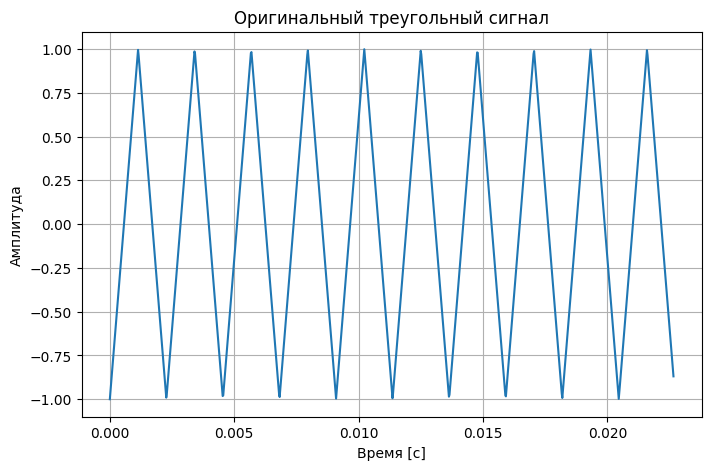

In [7]:
# Визуализация треугольного сигнала и его восстановления
plt.figure(figsize=(8, 5))
plt.plot(t[:1000], tri_signal[:1000])
plt.title('Оригинальный треугольный сигнал')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

## **1.2. Вычисление спектра с применением преобразования Фурье (FFT)**

In [8]:
N = len(tri_signal)
tri_fft = np.fft.fft(tri_signal)
tri_freqs = np.fft.fftfreq(N, 1/fs)

In [9]:
# Оставляем только положительные частоты
positive_freqs = tri_freqs[:N//2]
amplitude_spectrum = np.abs(tri_fft[:N//2]) / (N//2)  # Амплитудный спектр

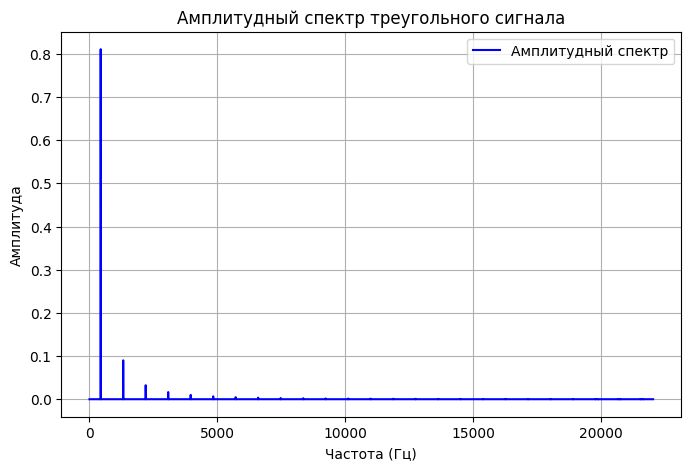

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(positive_freqs, amplitude_spectrum, 'b-', label="Амплитудный спектр")
plt.title('Амплитудный спектр треугольного сигнала')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

## **1.3. Обратное преобразование (IFFT)**

In [11]:
tri_ifft = np.fft.ifft(tri_fft)

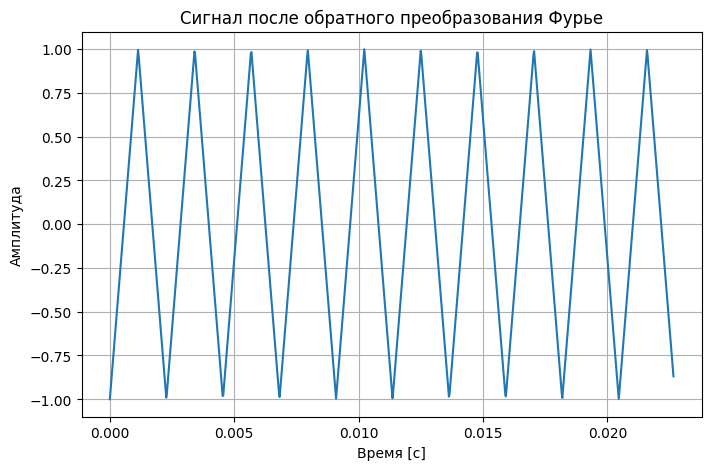

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(t[:1000], np.real(tri_ifft[:1000]))
plt.title('Сигнал после обратного преобразования Фурье')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

## **1.4. Преобразование в формат 16-битного PCM и сохранение в WAV**

In [13]:
output_dir  = "./output_lab2"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [14]:
tri_signal_int16 = np.int16(tri_signal / np.max(np.abs(tri_signal)) * 32767)
tri_ifft_int16 = np.int16(np.real(tri_ifft) / np.max(np.abs(np.real(tri_ifft))) * 32767)
write('./output_lab2/triangular_original.wav', fs, tri_signal_int16)
write('./output_lab2/triangular_reconstructed.wav', fs, tri_ifft_int16)

# **2. Прямоугольный сигнал**

## **2.1. Создание прямоугольного сигнала**

In [15]:
rect_signal = signal.square(2 * np.pi * freq * t)

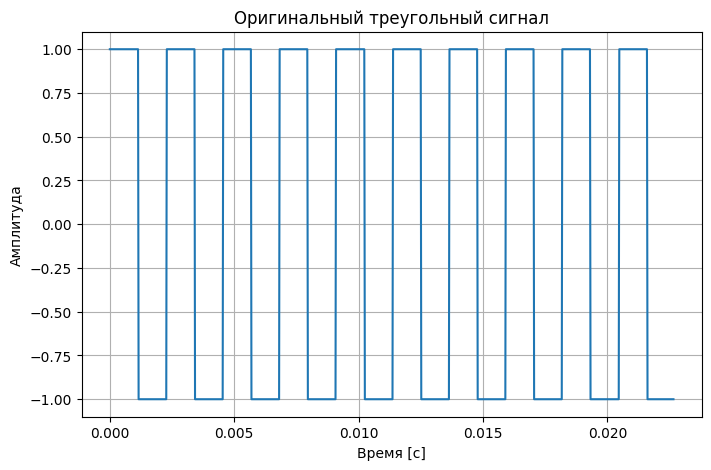

In [16]:
# Визуализация прямоугольного сигнала и его восстановления
plt.figure(figsize=(8, 5))
plt.plot(t[:1000], rect_signal[:1000])
plt.title('Оригинальный треугольный сигнал')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

## **2.2. Вычисление спектра с применением преобразования Фурье (FFT)**

In [17]:
N = len(tri_signal)
rect_fft = np.fft.fft(rect_signal)
rect_freqs = np.fft.fftfreq(N, 1/fs)

In [18]:
# Оставляем только положительные частоты
positive_freqs = rect_freqs[:N//2]
amplitude_spectrum = np.abs(rect_fft[:N//2]) / (N//2)  # Амплитудный спектр

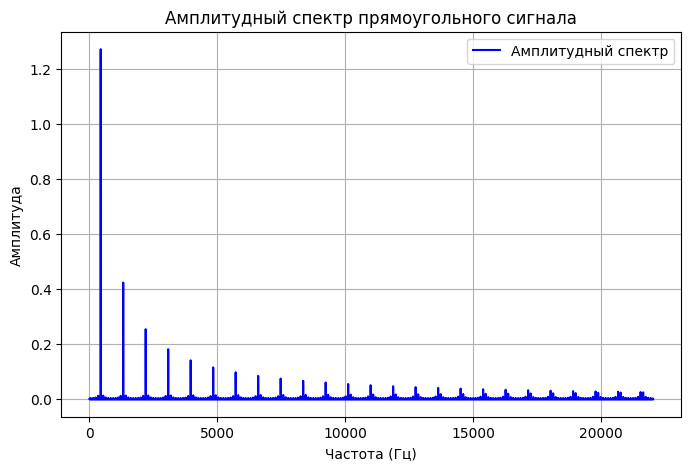

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(positive_freqs, amplitude_spectrum, 'b-', label="Амплитудный спектр")
plt.title('Амплитудный спектр прямоугольного сигнала')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

## **2.3. Обратное преобразование (IFFT)**

In [20]:
rect_ifft = np.fft.ifft(rect_fft)

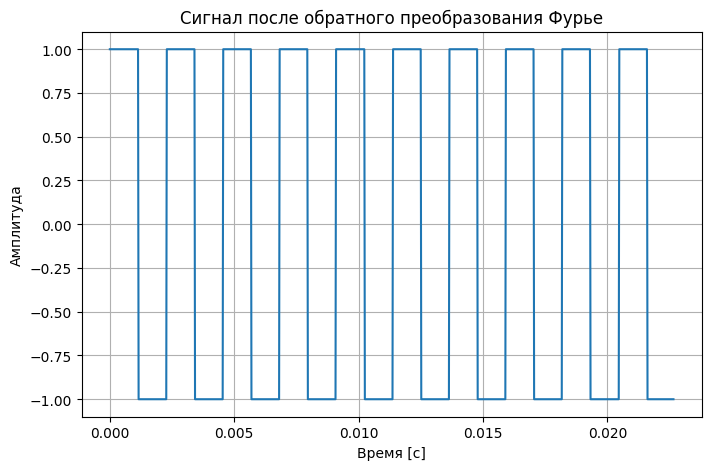

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(t[:1000], np.real(rect_ifft[:1000]))
plt.title('Сигнал после обратного преобразования Фурье')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

## **2.4. Преобразование в формат 16-битного PCM и сохранение в WAV**

In [22]:
rect_signal_int16 = np.int16(rect_signal / np.max(np.abs(rect_signal)) * 32767)
rect_ifft_int16 = np.int16(np.real(rect_ifft) / np.max(np.abs(np.real(rect_ifft))) * 32767)
write('./output_lab2/rectangular_original.wav', fs, rect_signal_int16)
write('./output_lab2/rectangular_reconstructed.wav', fs, rect_ifft_int16)

# **3. Update to github**

## 3.1. Save current file colab

In [31]:
os.chdir('/content')

In [28]:
import shutil
# Di chuyển hoặc sao chép notebook vào thư mục repo
shutil.copy("/content/ЗИотУТК_ЛАБ_2.ipynb", "/content//ЗИотУТК_ЛАБ_2.ipynb")

FileNotFoundError: [Errno 2] No such file or directory: '/content/ЗИотУТК_ЛАБ_2.ipynb'